In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
#defining fuzzy variables for temperature and fan speed
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
fan_speed = ctrl.Consequent(np.arange(0, 4000, 1), 'fan_speed')

In [ ]:
#membership function for temperature
temperature ['excellent'] = fuzz.trimf(temperature.universe, [0, 50, 70])
temperature ['avarage'] = fuzz.trimf(temperature.universe, [50,70,80])
temperature ['risky'] = fuzz.trimf(temperature.universe, [70,80,100])

#membership function for fan-speed
fan_speed ['slow'] = fuzz.trimf(fan_speed.universe, [0, 500, 1000])
fan_speed ['moderate'] = fuzz.trimf(fan_speed.universe, [1000,2000,3000])
fan_speed ['high'] = fuzz.trimf(fan_speed.universe, [2000,3000,4000])

In [ ]:
rule1=ctrl.Rule(temperature['excellent'],fan_speed['slow'])
rule2=ctrl.Rule(temperature['avarage'],fan_speed['moderate'])
rule3=ctrl.Rule(temperature['risky'],fan_speed['high'])
rule4=ctrl.Rule(temperature['avarage']& temperature['risky'],fan_speed['high']) # Changed 'average' to 'avarage'+
rule5=ctrl.Rule(temperature['excellent']&temperature['avarage'],fan_speed['moderate'])

2999.9994670219385


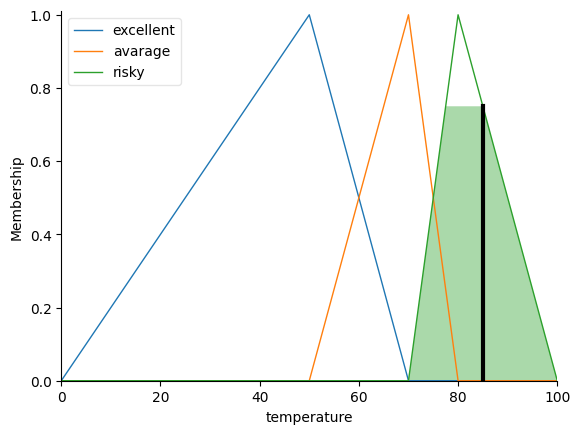

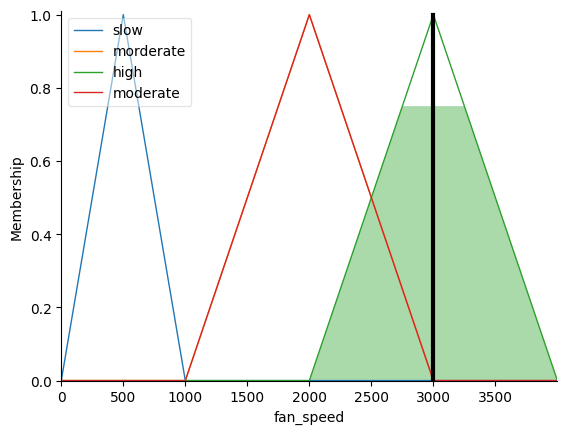

In [ ]:
#defining fuzzy rules
fan_ctrl =ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
fan_sim = ctrl.ControlSystemSimulation(fan_ctrl)

#The temperature value
fan_sim.input['temperature'] = 85
fan_sim.compute()
print(fan_sim.output['fan_speed'])
temperature.view(sim=fan_sim)
fan_speed.view(sim=fan_sim)